In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

%matplotlib inline

In [10]:
image = mpimg.imread("exit-ramp.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

In [11]:
# define a kernel size and apply gaussian smoothing
kernel_size = 5

blur_gray = cv2.GaussianBlur(gray, (kernel_size, kernel_size), 0)

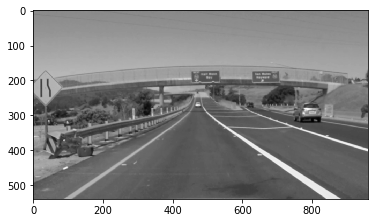

In [12]:
plt.imshow(blur_gray, cmap="gray")

In [13]:
low_threshold = 50
high_threshold = 150

In [14]:
masked_edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

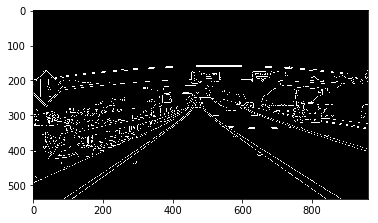

In [15]:
plt.imshow(masked_edges, cmap="gray")

In [17]:
# Deine our parameters for Canny and apply
rho = 1
theta = np.pi/180
threshold = 1
min_line_length = 10
max_line_gap = 1

In [18]:
line_image = np.copy(image)*0

In [19]:
# Run Hough on edge detected image
lines = cv2.HoughLinesP(masked_edges,
                       rho,
                       theta,
                       threshold,
                       np.array([]),
                       min_line_length,
                       max_line_gap)

In [21]:
len(lines)

205

In [22]:
for line in lines:
    for x1, y1, x2, y2 in line:
        cv2.line(line_image, 
                 (x1,y1),
                 (x2,y2),
                 (255,0,0),
                 10)

In [23]:
color_edges = np.dstack((masked_edges, masked_edges, masked_edges))

In [24]:
# Draw the lines on the edge image
combo = cv2.addWeighted(color_edges, 0.8, line_image, 1, 0)

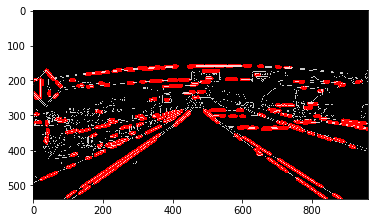

In [25]:
plt.imshow(combo)
plt.show()